In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm ,skew

In [2]:
df_train=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_train.csv')

In [3]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 2.0 GB


In [4]:
c_int=df_train.select_dtypes(include=['int64']).apply(pd.to_numeric,downcast='unsigned')
c_float=df_train.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')


In [5]:
o_df=pd.concat([c_int,c_float],axis=1)

In [6]:
column_type=dict(o_df.dtypes.copy())

In [7]:
len(column_type)

108

In [8]:
del o_df,c_int,c_float,df_train

In [9]:
data_train=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_train.csv',
                      dtype=column_type,parse_dates=['register_time'],infer_datetime_format=True)

data_test=pd.read_csv('F:\\study\\ml\\DataSet\\Tap4fun\\tap_fun_test.csv',
                      dtype=column_type,parse_dates=['register_time'],infer_datetime_format=True)

In [10]:
data_train.rename(columns={'treatment_acceleraion_add_value':'treatment_acceleration_add_value',\
                          'sr_rss_a_prod_levell':'sr_rss_a_prod_level'} ,inplace=True)

data_test.rename(columns={'treatment_acceleraion_add_value':'treatment_acceleration_add_value',\
                          'sr_rss_a_prod_levell':'sr_rss_a_prod_level'} ,inplace=True)

In [11]:
data_train.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [12]:
data_test.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count
0,14933,2018-03-08 20:27:57,166415.0,138362.0,0.0,0.0,0.0,0.0,258522.0,90142.0,...,0,0,0,0,1,1,1,8.000000,0.0,0
1,14934,2018-03-08 20:29:42,10000.0,600.0,0.0,0.0,0.0,0.0,10000.0,400.0,...,0,0,0,0,0,0,0,0.166667,0.0,0
2,14935,2018-03-08 20:30:13,10000.0,3700.0,0.0,0.0,0.0,0.0,10000.0,2000.0,...,0,0,0,0,0,0,0,17.000000,0.0,0
3,14936,2018-03-08 20:31:41,210000.0,0.0,200000.0,0.0,200000.0,0.0,610000.0,0.0,...,0,0,0,0,0,0,0,1.666667,0.0,0
4,14937,2018-03-08 20:32:07,11500.0,3700.0,0.0,0.0,0.0,0.0,11000.0,2000.0,...,0,0,0,0,0,0,0,0.333333,0.0,0


In [13]:
data_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: datetime64[ns](1), float32(13), uint16(8), uint32(21), uint8(66)
memory usage: 493.1 MB


In [14]:
data_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828934 entries, 0 to 828933
Columns: 108 entries, user_id to pay_count
dtypes: datetime64[ns](1), float32(12), uint16(8), uint32(21), uint8(66)
memory usage: 175.5 MB


In [15]:
# data_label=data_train['prediction_pay_price']
data_train2=data_train.drop(labels=['user_id','register_time'],axis=1)
data_test2=data_test.drop(labels=['user_id','register_time'],axis=1)

In [16]:
train_7pay=data_train2[data_train2['pay_price']>0].copy()
test_7pay=data_test2[data_test2['pay_price']>0].copy()

In [17]:
train_7pay.shape

(41439, 107)

In [18]:
test_7pay.shape

(19549, 106)

In [19]:
#######################################

In [26]:
# plt.scatter(train_7pay.pay_price,train_7pay.prediction_pay_price)
# plt.show()

In [27]:
# plt.subplot(1,2,1)
# sns.distplot(train_7pay.prediction_pay_price,kde=False,fit=norm)

# plt.subplot(122)
# sns.distplot(np.log(train_7pay.prediction_pay_price),kde=False,fit=norm)
# plt.show()

In [87]:
train_7pay3=data_train2[data_train2['pay_price']>50].copy()
# test_7pay3=data_test2[data_test2['prediction_pay_price']>2].copy()

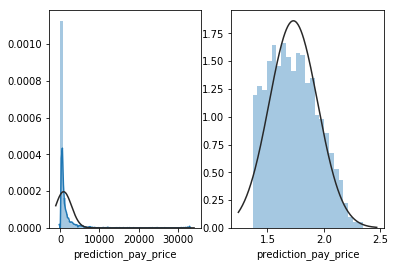

In [88]:
plt.subplot(1,2,1)
sns.distplot(train_7pay3.prediction_pay_price,kde=True,fit=norm)

plt.subplot(122)
sns.distplot(np.log(np.log(train_7pay3.prediction_pay_price)),kde=False,fit=norm)
plt.show()

In [ ]:
skew(train_7pay.prediction_pay_price)

In [ ]:
skew(np.log(train_7pay.prediction_pay_price))

In [ ]:
train_7pay['prediction_pay_price']=np.log(train_7pay.prediction_pay_price)

In [ ]:
train_7pay.info()

In [ ]:
numeric_dtypes=['uint8','uint16','uint32','uint64','float32']
numeric2=[]
for i in train_7pay.columns:
    if train_7pay[i].dtype in numeric_dtypes:
        numeric2.append(i)
numeric2        

In [ ]:
numeric_dtypes=['uint8','uint16','uint32','uint64','float16','float32','float64']
numeric2=[]
for i in train_7pay.columns:
    if train_7pay[i].dtype in numeric_dtypes:
        numeric2.append(i)
skew_train_7pay=train_7pay[numeric2].apply(lambda x:skew(x)).sort_values(ascending=False)
skews=pd.DataFrame({'skew':skew_train_7pay})
skews

In [ ]:
numeric_dtypes=['uint8','uint16','uint32','uint64','float16','float32','float64']
numeric22=[]
for i in test_7pay.columns:
    if test_7pay[i].dtype in numeric_dtypes:
        numeric22.append(i)
skew_test_7pay=test_7pay[numeric22].apply(lambda x:skew(x)).sort_values(ascending=False)
skews22=pd.DataFrame({'skew':skew_test_7pay})
skews22

In [ ]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [ ]:
high_skew=skew_train_7pay[skew_train_7pay>0.5]
high_skew=high_skew
skew_index=high_skew.index

for i in skew_index:
    train_7pay[i]=boxcox1p(train_7pay[i],boxcox_normmax(train_7pay[i]+1))
skew_train_7pay2=train_7pay[numeric2].apply(lambda x:skew(x)).sort_values(ascending=False)
skew2=pd.DataFrame({'skew':skew_train_7pay2})
skew2

In [ ]:
high_skew2=skew_test_7pay[skew_test_7pay>0.5]
high_skew2=high_skew2
skew_index2=high_skew2.index

for i in skew_index2:
    test_7pay[i]=boxcox1p(test_7pay[i],boxcox_normmax(test_7pay[i]+1))
skew_test_7pay2=test_7pay[numeric22].apply(lambda x:skew(x)).sort_values(ascending=False)
skew2=pd.DataFrame({'skew':skew_test_7pay2})
skew2

In [ ]:
data_7pay.shape

In [ ]:
drop_col=[i for i in train_7pay.columns.values if 'prediction' in i]
X=train_7pay.drop(labels=drop_col,axis=1)
y=train_7pay.prediction_pay_price
X.replace([np.inf,-np.inf],np.nan,inplace=True)
X.fillna(0.0,inplace=True)
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

kfolds=KFold(n_splits=10,shuffle=False,random_state=13)


def cv_rmse(model):
    rmse=np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=kfolds))
    return rmse

lm = LinearRegression()

benchmark_model=make_pipeline(RobustScaler(),
                             lm).fit(X,y)

cv_rmse(benchmark_model).mean()

In [ ]:
X=train_7pay.drop(labels=drop_col,axis=1)
y=train_7pay.prediction_pay_price
X.replace([np.inf,-np.inf],np.nan,inplace=True)
X.fillna(0.0,inplace=True)

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
X1,val_X1,y1,val_y1=train_test_split(X,y,test_size=0.2,random_state=17)

In [ ]:
kfolds2=KFold(n_splits=3,shuffle=False,random_state=29)

In [ ]:
ridge_model=make_pipeline(RobustScaler(),
                         RidgeCV(alphas=[15],cv=kfolds2)).fit(X1,y1)
cv_rmse(ridge_model).mean()

In [ ]:
r_pred=ridge_model.predict(val_X1)

In [ ]:
r_pred

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(np.expm1(val_y1),np.expm1(r_pred)))

In [ ]:
np.expm1(0.385)

In [ ]:
r_alpha=np.arange(10,21,1)
def ridge_selector(k):
    ridge_model=make_pipeline(RobustScaler(),
                             RidgeCV(alphas=[k],cv=kfolds)).fit(X,y)
    return cv_rmse(ridge_model).mean()

r_score=[]
for i in r_alpha:
    score=ridge_selector(i)
    r_score.append(score)    

In [ ]:
r_score_df=pd.DataFrame(list(zip(r_alpha,r_score)),columns=['Alpha','RMSE'])

In [ ]:
r_score_df.sort_values(by='RMSE')

In [ ]:
r_alpha2=pd.Series(np.arange(14,16,0.1)).apply(lambda x:round(x,2))

ridge_model=make_pipeline(RobustScaler(),
                         RidgeCV(alphas=r_alpha2.tolist(),cv=kfolds)).fit(X,y)
cv_rmse(ridge_model).mean()

In [ ]:
ridge_model.steps[1][1].alpha_

In [ ]:
# l_alpha=[0.01,0.1,0.5,1,5,10,15,20,30,50]
# l_alpha2=pd.Series(np.arange(0.001,0.02,0.002)).apply(lambda x:round(x,3))
l_alpha2 = [0.00001,0.00002,0.00003,0.00004,0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]

lasso_model=make_pipeline(RobustScaler(),
                         LassoCV(alphas=l_alpha2,max_iter=1e5,cv=kfolds)).fit(X,y)
cv_rmse(lasso_model).mean()

In [ ]:
lasso_model.steps[1][1].alpha_

In [ ]:
la_coef=pd.DataFrame(list(zip(X.columns,lasso_model.steps[1][1].coef_)),columns=['predictors','coef'])
la_coef.sort_values(by='coef',ascending=False)

In [ ]:
la_coef[la_coef.coef == 0].shape

In [ ]:
used_la_coef=la_coef[la_coef.coef !=0]['predictors']
used_la_coef.shape

In [ ]:
X[used_la_coef].shape

In [ ]:
X2=X[used_la_coef]

In [ ]:
def cv_rmse2(model):
    rmse=np.sqrt(-cross_val_score(model,X2,y,scoring='neg_mean_squared_error',cv=kfolds))
    return rmse

In [ ]:
r_alpha2=pd.Series(np.arange(10,12,0.1)).apply(lambda x:round(x,1))
# r_alpha=np.arange(1,15,1)
ridge_model=make_pipeline(RobustScaler(),
                         RidgeCV(alphas=r_alpha2.tolist(),cv=kfolds)).fit(X2,y)
cv_rmse2(ridge_model).mean()

In [ ]:
ridge_model.steps[1][1].alpha_

In [ ]:
l_alpha2 = [0.00001,0.00002,0.00003,0.00004,0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]

lasso_model=make_pipeline(RobustScaler(),
                         LassoCV(alphas=l_alpha2,max_iter=1e5,cv=kfolds)).fit(X2,y)
cv_rmse2(lasso_model).mean()

In [ ]:
lasso_model.steps[1][1].alpha_

In [ ]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.00001,0.00005,0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv=make_pipeline(RobustScaler(),
                        ElasticNetCV(max_iter=1e5,alphas=e_alphas,l1_ratio=e_l1ratio,cv=kfolds)).fit(X2,y)
cv_rmse2(elastic_cv).mean()

In [ ]:
elastic_cv.steps[1][1].alpha_

In [ ]:
elastic_cv.steps[1][1].l1_ratio_

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
cv_rmse(lgbm_model).mean()

In [ ]:
cv_rmse2(lgbm_model).mean()

In [ ]:
np.expm1(0.381)

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb3 = XGBRegressor(learning_rate =0.01, n_estimators=3460, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)



In [ ]:
cv_rmse(xgb3).mean()

In [ ]:
cv_rmse2(xgb3).mean()

In [ ]:
xgb_fit=xgb3.fit(X,y)